## <p style="text-align: center;">Electric Vehicle Analysis<p>
### Описание проекта
Этот проект представляет собой анализ данных по электромобилям. Он включает в себя несколько функций, которые обрабатывают и анализируют данные по местоположению автомобилей, моделям, и другим характеристикам. В частности, проект позволяет:

- Извлекать данные из CSV-файла и преобразовывать их в удобные для анализа словари.
- Определять количество или VIN-номера электромобилей, находящихся в заданном радиусе от определённой точки.
- Анализировать частоту встречаемости моделей электромобилей.
- Возвращать уникальные модели.

#### 1. Импорт необходимых библиотек

In [61]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from geopy.distance import geodesic
import json

# Настройка стиля для графиков
sns.set(style="whitegrid")
%matplotlib inline

#### 2. Загрузка и изучение данных

In [62]:
# Загрузка данных из CSV файла
data_file = 'Electric_Vehicle_Population_Data.csv'
df = pd.read_csv(data_file)

# Просмотр первых 5 строк датасета
df.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [63]:
# Проверка общей информации о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         205439 non-null  object 
 1   County                                             205436 non-null  object 
 2   City                                               205436 non-null  object 
 3   State                                              205439 non-null  object 
 4   Postal Code                                        205436 non-null  float64
 5   Model Year                                         205439 non-null  int64  
 6   Make                                               205439 non-null  object 
 7   Model                                              205438 non-null  object 
 8   Electric Vehicle Type                              205439 non-null  object

#### 3. Предобработка данных

In [64]:
# Подсчет количества пропущенных значений в каждом столбце
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Пропущенные значения': missing_values,
    'Процент (%)': missing_percentage
})
missing_df = missing_df[missing_df['Пропущенные значения'] > 0]
missing_df = missing_df.sort_values(by='Пропущенные значения', ascending=False)
missing_df

,Пропущенные значения,Процент (%)
Legislative District,442,0.215149
Base MSRP,8,0.003894
Vehicle Location,8,0.003894
Electric Range,8,0.003894
City,3,0.001460
County,3,0.001460
Electric Utility,3,0.001460
Postal Code,3,0.001460
2020 Census Tract,3,0.001460
Model,1,0.000487


#### 4. Анализ и исследование данных

#### 4.1. Самые популярные марки электромобилей

Make
TESLA         90098
CHEVROLET     15085
NISSAN        14513
FORD          10811
KIA            9093
BMW            8467
TOYOTA         7920
HYUNDAI        5772
RIVIAN         5667
VOLKSWAGEN     5625
Name: count, dtype: int64


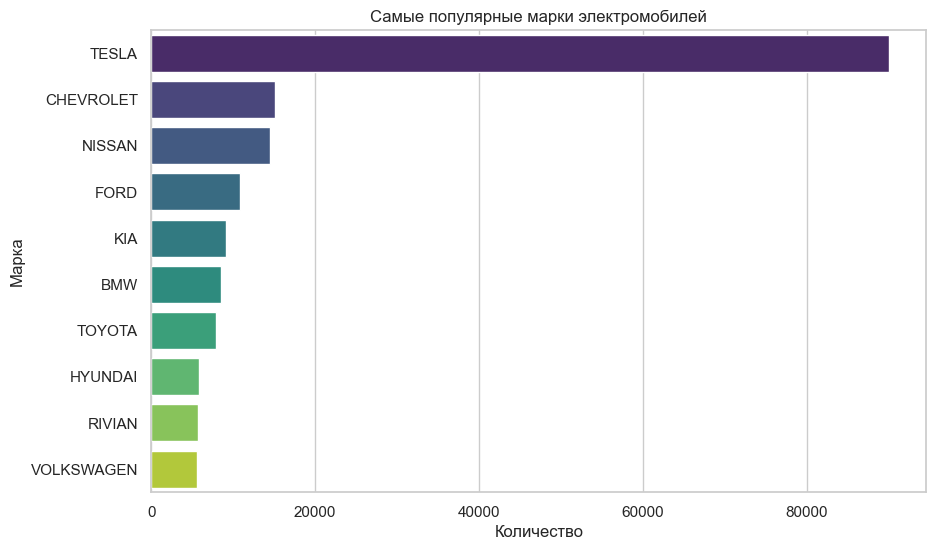

In [65]:
# Вычисляем количество автомобилей по маркам
popular_brands = df_cleaned['Make'].value_counts().head(10)
print(popular_brands)

# Визуализация самых популярных марок с назначением 'hue' и отключением легенды
plt.figure(figsize=(10,6))
sns.barplot(
    x=popular_brands.values,
    y=popular_brands.index,
    hue=popular_brands.index,  # Назначаем 'y' параметру 'hue'
    palette="viridis",
    dodge=False,               # Отключаем разбиение по категориям
    legend=False               # Отключаем легенду
)
plt.title('Самые популярные марки электромобилей')
plt.xlabel('Количество')
plt.ylabel('Марка')
plt.show()

#### 4.2. Самые популярные модели электромобилей

Model
MODEL Y           43341
MODEL 3           32022
LEAF              13476
MODEL S            7861
BOLT EV            6717
MODEL X            6236
VOLT               4818
ID.4               4553
MUSTANG MACH-E     4145
WRANGLER           4033
Name: count, dtype: int64


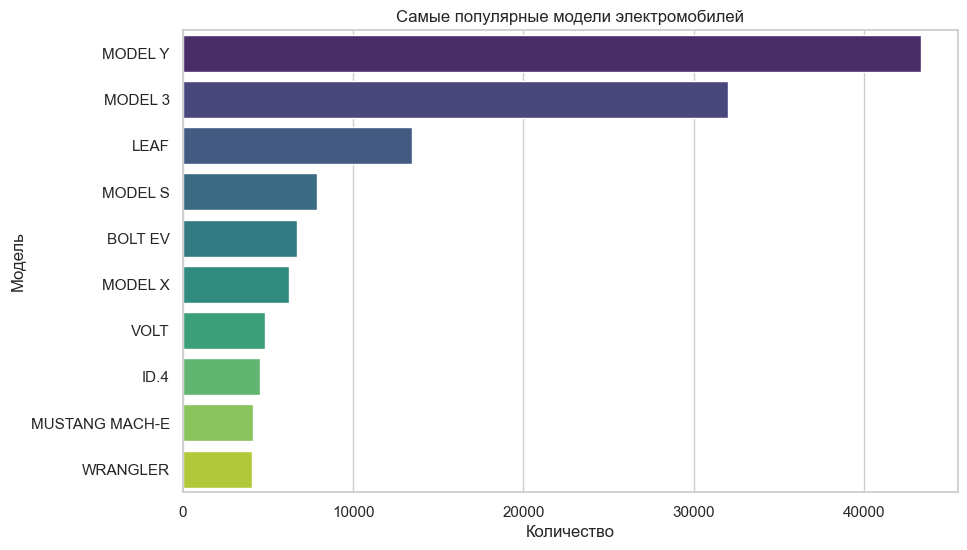

In [66]:
# Вычисляем количество автомобилей по моделям
popular_models = df_cleaned['Model'].value_counts().head(10)
print(popular_models)

# Визуализация самых популярных моделей
plt.figure(figsize=(10,6))
sns.barplot(
    x=popular_models.values,
    y=popular_models.index,
    hue=popular_brands.index,  # Назначаем 'y' параметру 'hue'
    palette="viridis",
    dodge=False,               # Отключаем разбиение по категориям
    legend=False               # Отключаем легенду
)
plt.title('Самые популярные модели электромобилей')
plt.xlabel('Количество')
plt.ylabel('Модель')
plt.show()

#### 4.3. Популярность типов электромобилей (BEVs vs PHEVs) по годам

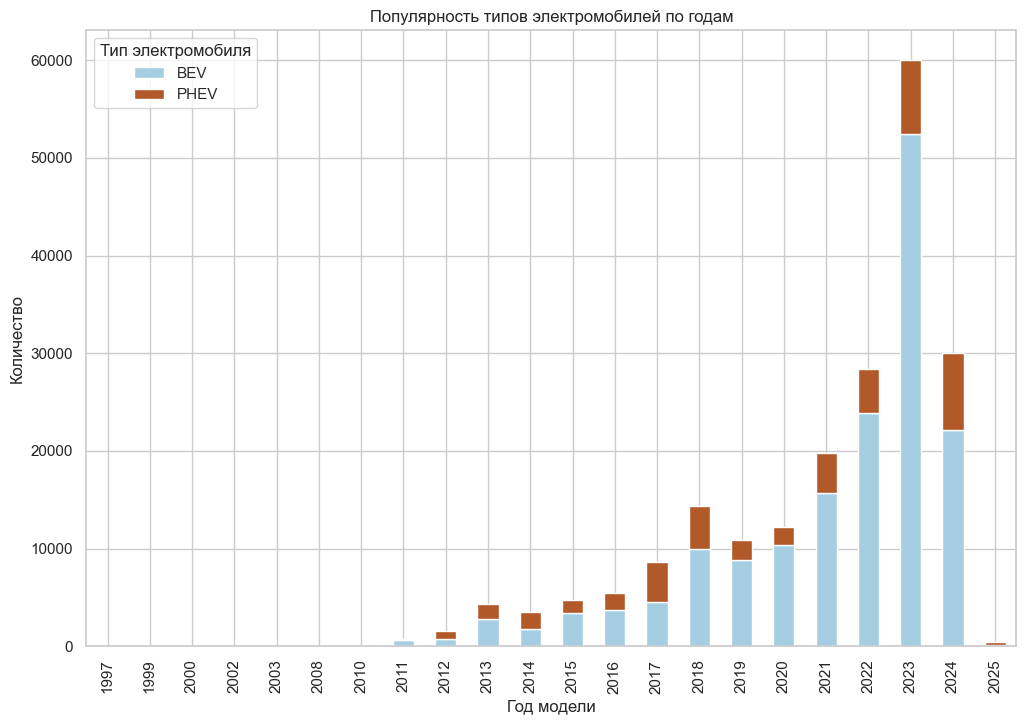

In [67]:
# Группируем данные по году и типу электромобиля
type_by_year = df_cleaned.groupby(['Model Year', 'Electric Vehicle Type']).size().unstack().fillna(0)

# Переименование типов для удобства
type_by_year = type_by_year.rename(columns={
    'Battery Electric Vehicle (BEV)': 'BEV',
    'Plug-in Hybrid Electric Vehicle (PHEV)': 'PHEV',
    'Eligibility unknown as battery range has not been researched': 'Unknown'
})

# Визуализация
type_by_year[['BEV', 'PHEV']].plot(kind='bar', stacked=True, figsize=(12,8), colormap='Paired')
plt.title('Популярность типов электромобилей по годам')
plt.xlabel('Год модели')
plt.ylabel('Количество')
plt.legend(title='Тип электромобиля')
plt.show()

#### 4.4. Количество выпущенных электромобилей в определенные годы

Model Year
1997        1
1999        4
2000        7
2002        2
2003        1
2008       22
2010       24
2011      707
2012     1546
2013     4325
2014     3494
2015     4728
2016     5462
2017     8639
2018    14351
2019    10846
2020    12206
2021    19767
2022    28380
2023    60062
2024    29995
2025      414
Name: count, dtype: int64


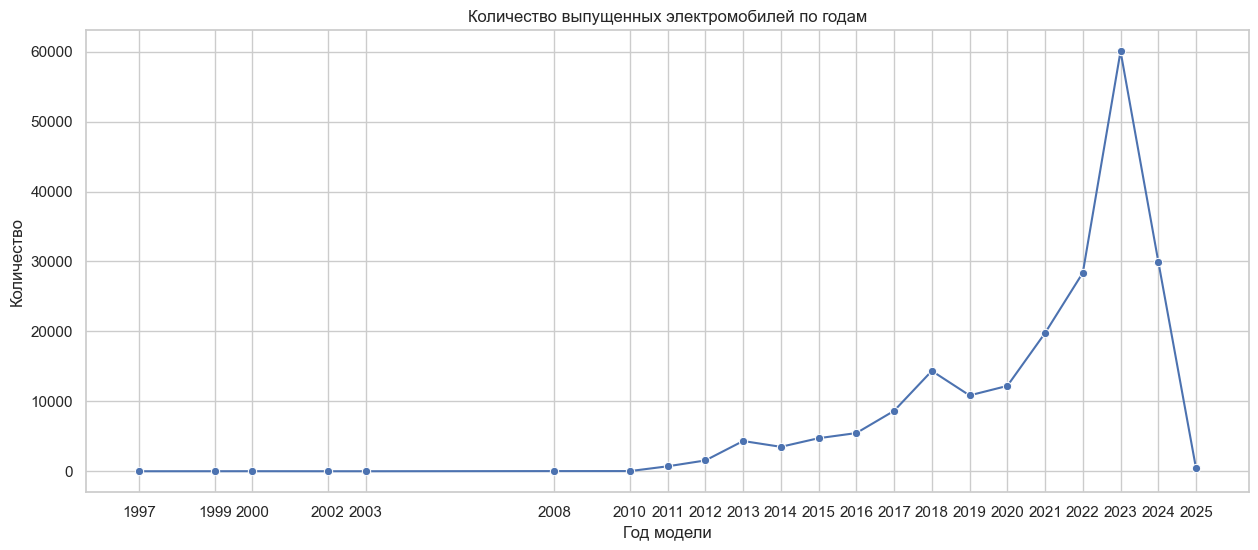

In [75]:
# Вычисляем количество автомобилей по годам
vehicles_per_year = df_cleaned['Model Year'].value_counts().sort_index()
print(vehicles_per_year)

# Визуализация количества автомобилей по годам
plt.figure(figsize=(15,6))
sns.lineplot(x=vehicles_per_year.index, y=vehicles_per_year.values, marker='o')
plt.title('Количество выпущенных электромобилей по годам')
plt.xlabel('Год модели')
plt.ylabel('Количество')
plt.xticks(vehicles_per_year.index)
plt.grid(True)
plt.show()

#### 5. Разработка модулей и функций

#### 5.1. Функция для загрузки данных и преобразования их в словарь

In [69]:
def load_data_to_dict(filename):
    """
    Загружает данные из CSV файла и возвращает два словаря:
    - Один с названиями столбцов и значениями в виде списков.
    - Другой с VIN-номерами в качестве ключей и данными по этим VIN.

    Parameters:
    filename (str): Путь к CSV файлу.

    Returns:
    dict: Словарь с названиями столбцов и значениями в виде списков.
    dict: Словарь, где ключами являются VIN-номера, а значениями являются данные для каждого VIN.
    """
    # Загрузка данных из CSV файла
    df = pd.read_csv(filename)
    
    # Преобразование 'Vehicle Location' в координаты (долгота, широта)
    df[['Longitude', 'Latitude']] = df['Vehicle Location'].str.extract(r'POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)')
    df['Longitude'] = df['Longitude'].astype(float)
    df['Latitude'] = df['Latitude'].astype(float)
    
    # Преобразуем координаты в кортежи
    df['Vehicle Location'] = list(zip(df['Longitude'], df['Latitude']))
    
    # Создаем словарь с названиями столбцов и списками
    data_dict = df.to_dict(orient='list')
    
    # Создаем словарь, где ключами будут VIN-номера
    vin_dict = {}
    for index, row in df.iterrows():
        vin = row['VIN (1-10)']
        vin_dict[vin] = {
            'Vehicle Location': row['Vehicle Location'],
            'Model': [row['Make'], row['Model']],
            'Electric Vehicle Type': row['Electric Vehicle Type'],
            'Electric Range': row['Electric Range'],
            'Base MSRP': row['Base MSRP'],
            'Model Year': row['Model Year'],
            'County': row['County'],
            'City': row['City'],
            'State': row['State'],
            'Postal Code': row['Postal Code'],
        }

    return data_dict, vin_dict

# Пример использования функции
data_file = 'Electric_Vehicle_Population_Data.csv'
data_dict, vin_dict = load_data_to_dict(data_file)

# Пример вывода: названия столбцов
print(list(data_dict.keys())[:5])  # Вывод первых 5 ключей
print(vin_dict['JTMAB3FV3P'])  # Пример данных для конкретного VIN


['VIN (1-10)', 'County', 'City', 'State', 'Postal Code']
{'Vehicle Location': (-117.4268937, 47.7323627), 'Model': ['TOYOTA', 'RAV4 PRIME'], 'Electric Vehicle Type': 'Plug-in Hybrid Electric Vehicle (PHEV)', 'Electric Range': 42.0, 'Base MSRP': 0.0, 'Model Year': 2023, 'County': 'Spokane', 'City': 'Spokane', 'State': 'WA', 'Postal Code': 99208.0}


#### 5.2. Функция для поиска электромобилей в заданном радиусе

In [70]:
def find_vehicles_within_radius(coordinates, vin_list, reference_point, radius_km, return_vin=False):
    """
    Находит количество электромобилей или их VIN-номера в заданном радиусе от референсной точки.

    Parameters:
    coordinates (list of tuples): Список координат электромобилей [(lat1, lon1), (lat2, lon2), ...].
    vin_list (list of str): Список VIN-номеров для каждого электромобиля.
    reference_point (tuple): Референсные координаты (lat, lon).
    radius_km (float): Радиус в километрах.
    return_vin (bool): Если True, возвращает список VIN-номеров; если False, возвращает количество.

    Returns:
    int or list: Количество электромобилей в радиусе или список VIN-номеров.
    """
    vehicles_in_radius = []
    
    for idx, coord in enumerate(coordinates):
        distance = geodesic(reference_point, coord).kilometers
        if distance <= radius_km:
            if return_vin:
                vehicles_in_radius.append(vin_list[idx])
            else:
                vehicles_in_radius.append(coord)

    if return_vin:
        return vehicles_in_radius
    else:
        return len(vehicles_in_radius)

# Пример использования функции
coordinates = [(47.5798304, -122.8728334), (47.5759584, -122.6961203), (47.6099315, -122.3340795)]
vin_list = ['JTMAB3FV3P', '1N4AZ1CP6J', '5YJ3E1EA4L']
reference_point = (47.6062, -122.3321)  # Координаты Сиэтла
radius_km = 50  # 50 км радиус

# Найти количество электромобилей в радиусе
count = find_vehicles_within_radius(coordinates, vin_list, reference_point, radius_km)
print(f"Количество электромобилей в радиусе {radius_km} км: {count}")

# Найти VIN-номера электромобилей в радиусе
vin_in_radius = find_vehicles_within_radius(coordinates, vin_list, reference_point, radius_km, return_vin=True)
print(f"VIN-номера электромобилей в радиусе {radius_km} км: {vin_in_radius}")


Количество электромобилей в радиусе 50 км: 3
VIN-номера электромобилей в радиусе 50 км: ['JTMAB3FV3P', '1N4AZ1CP6J', '5YJ3E1EA4L']


#### 5.3. Функция для анализа наиболее встречающихся моделей

In [71]:
from collections import Counter

def analyze_models(model_list, return_unique=False):
    """
    Возвращает либо наиболее часто встречающиеся модели в порядке убывания, либо список уникальных моделей.

    Parameters:
    model_list (list of lists): Список пар марки и модели, например: [['Tesla', 'Model Y'], ['Tesla', 'Model S'], ...].
    return_unique (bool): Если True, возвращает список уникальных моделей; если False, возвращает модели по частоте встречаемости.

    Returns:
    list: Список уникальных моделей или список наиболее встречающихся моделей.
    """
    # Объединяем марку и модель в одну строку для удобства анализа
    combined_list = [' '.join(model) for model in model_list]
    
    if return_unique:
        # Возвращаем уникальные модели
        return list(set(combined_list))
    else:
        # Считаем частоту встречаемости каждой модели и сортируем по убыванию
        model_counter = Counter(combined_list)
        return model_counter.most_common()

# Пример использования функции
model_list = [['Tesla', 'Model Y'], ['Tesla', 'Model S'], ['Tesla', 'Model Y'], 
              ['Nissan', 'Leaf'], ['Chevrolet', 'Bolt EV'], ['Tesla', 'Model 3']]

# Получить наиболее часто встречающиеся модели
most_common_models = analyze_models(model_list)
print(f"Наиболее часто встречающиеся модели: {most_common_models}")

# Получить список уникальных моделей
unique_models = analyze_models(model_list, return_unique=True)
print(f"Уникальные модели: {unique_models}")


Наиболее часто встречающиеся модели: [('Tesla Model Y', 2), ('Tesla Model S', 1), ('Nissan Leaf', 1), ('Chevrolet Bolt EV', 1), ('Tesla Model 3', 1)]
Уникальные модели: ['Chevrolet Bolt EV', 'Nissan Leaf', 'Tesla Model 3', 'Tesla Model Y', 'Tesla Model S']
